# Boston Housing Predictions using Linear Regression

In [118]:
#Importing python libraries  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import datasets

In [119]:
#loading the dataset(load_boston) from sklearn datasets
boston=datasets.load_boston()

C:\Users\Worldclass 3\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing da

In [74]:
#checking the boston dataset dictionary keys
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [75]:
#converting the data into DataFrame
bostonhousing = pd.DataFrame(boston.data, columns=boston.feature_names)

In [76]:
bostonhousing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [77]:
#create column for t
bostonhousing['MEDV']=boston.target

In [78]:
bostonhousing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [80]:
#Checking for null values
bostonhousing.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

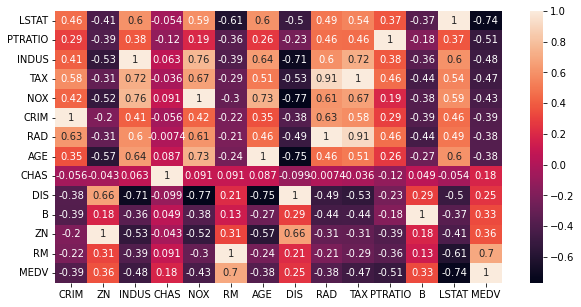

In [84]:
#create heatmap to visualize correlation among variables
plt.figure(figsize=(10,5))
sns.heatmap(bostonhousing.corr().sort_values('MEDV'),annot=True);

In [88]:

bostonhousing.corr()['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

According to the table above RM is the column most correlated with our MEDV target column, and LSTAT is the feature with the least correlation to our MEDV target column

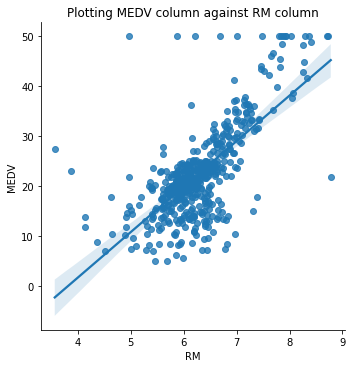

In [92]:
sns.lmplot(x='RM',y='MEDV',data=bostonhousing)
plt.title('Plotting MEDV column against RM column');

Plotting a scatter plot with a regression line to see which would see the line of best fit

In [108]:
from sklearn.linear_model import LinearRegression
# importing necessary machine learning model

In [96]:
#import a train test split
from sklearn.model_selection import train_test_split

In [109]:
#Divide data in features and target( Dependent and Independent Variables)
X=bostonhousing.drop('MEDV',axis=1)
y=bostonhousing['MEDV']

In [110]:
#Spliting data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [111]:
#Instantiating the model
lr=LinearRegression()

In [112]:
#fitting the model
lr.fit(X_train,y_train)

LinearRegression()

In [113]:
#making predictions off the untouched X_test
predictions=lr.predict(X_test)

In [114]:
#import metrics for model evaluation
from sklearn import metrics

In [115]:
#evaluating the model
print('Mean Absolute error:',metrics.mean_absolute_error(y_test,predictions))
print('Mean Squared error:',metrics.mean_squared_error(y_test,predictions))
print('Root Mean Squared error:',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

Mean Absolute error: 3.148255754816827
Mean Squared error: 20.72402343733974
Root Mean Squared error: 4.55236459846306


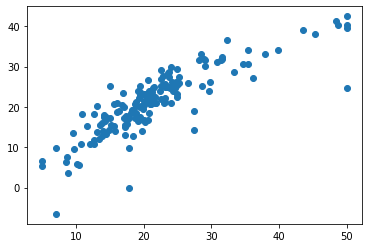

In [117]:
plt.scatter(y_test,predictions);